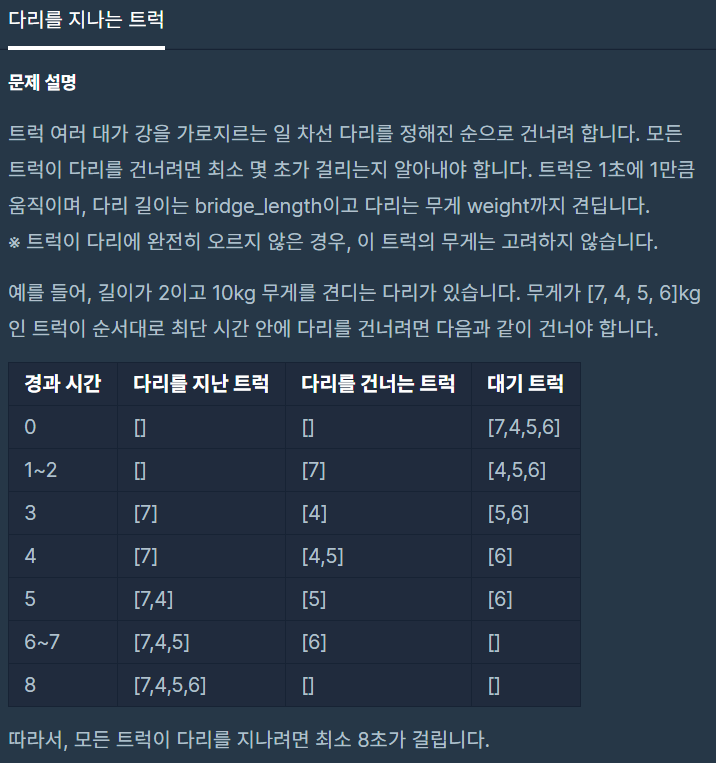

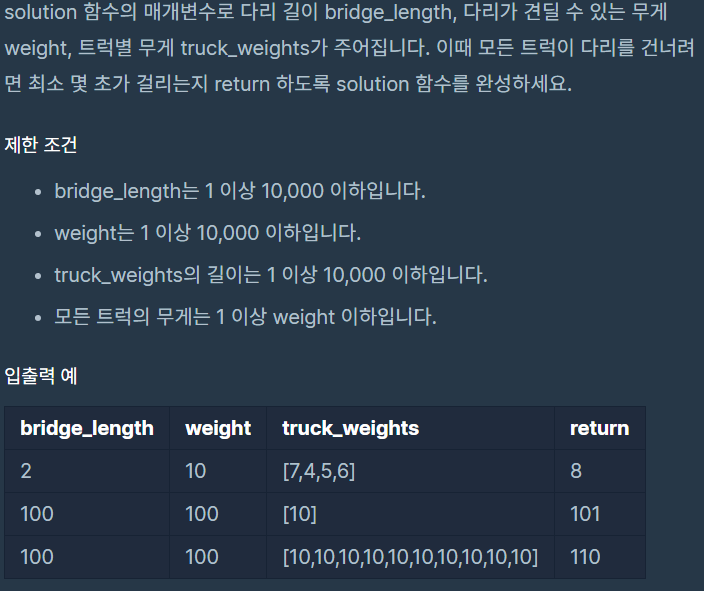

In [2]:
def solution(bridge_length, weight, truck_weights):
    answer = 0
    
    t_list = []
    for i in truck_weights:
        q_truck = i
        while q_truck !=0:
            if len(t_list) == bridge_length:
                t_list.pop()
                
            if (sum(t_list)+q_truck) <=weight:
                t_list.insert(0,q_truck)
                q_truck = 0
                answer +=1
            else:
                t_list.insert(0,0)
                answer +=1
    answer = answer+bridge_length
    return answer

In [3]:
print(solution(2,10,[7,4,5,6]))
print(solution(100,100,[10]))
print(solution(100,100,[10,10,10,10,10,10,10,10,10,10]))

8
101
110


In [5]:
def solution(bridge_length, weight, truck_weights):
    q=[0]*bridge_length
    sec=0
    while q:
        sec+=1
        q.pop(0)
        if truck_weights:
            if sum(q)+truck_weights[0]<=weight:
                q.append(truck_weights.pop(0))
            else:
                q.append(0)
    return sec

In [6]:
print(solution(2,10,[7,4,5,6]))
print(solution(100,100,[10]))
print(solution(100,100,[10,10,10,10,10,10,10,10,10,10]))

8
101
110


In [11]:
from collections import deque
def solution(bridge_length, weight, truck_weights):
    sec = 1
    s = truck_weights[0]
    truck_weights = deque(truck_weights)
    trucks_on_bridge = deque([[truck_weights[0],1]])
    truck_idx = 1
    while truck_weights:
        sec +=1
        if truck_idx < len(truck_weights):
            if s + truck_weights[truck_idx] <= weight:
                s += truck_weights[truck_idx]
                trucks_on_bridge.append([truck_weights[truck_idx], 0])
                truck_idx += 1
        for truck in trucks_on_bridge:
            truck[1] += 1
        if trucks_on_bridge and trucks_on_bridge[0][1] == bridge_length:
            s -= trucks_on_bridge[0][0]
            trucks_on_bridge.popleft()
            truck_weights.popleft()
            truck_idx -= 1
    sec += 1
    return sec

In [12]:
print(solution(2,10,[7,4,5,6]))
print(solution(100,100,[10]))
print(solution(100,100,[10,10,10,10,10,10,10,10,10,10]))

8
101
110


In [18]:
def solution(bridge_length, weight, truck_weights):
    truck_weights = truck_weights[::-1]
    n = len(truck_weights)
    passing_weight = [0]*n
    passed = []; passing = []
    
    i = 0; j = -1
    while len(passed)<n:
        if len(truck_weights)>0 and sum(passing) + truck_weights[-1] <= weight:
            passing.append(truck_weights.pop())
            j+=1
        passing_weight[:j+1] = [passing_weight[z]+1 for z in range(j+1)]
        
        if passing_weight[i] == bridge_length:
            passed.append(passing[0])
            passing = passing[1:]
            i+=1
    return passing_weight[0]+1

In [19]:
print(solution(2,10,[7,4,5,6]))
print(solution(100,100,[10]))
print(solution(100,100,[10,10,10,10,10,10,10,10,10,10]))

8
101
110


In [20]:
def solution(bridge_length, weight, truck_weights):
    answer = 0
    ing=[]
    cnt=[]
    ed=[]
    
    while 1:
        if (truck_weights==[]) and (ing == []):
            break
        answer+=1
        for i in range(len(cnt)):
            cnt[i]-=1
        if (cnt!=[])and(cnt[0]==0):
            ed.append(ing[0])
            del cnt[0]
            del ing[0]
        if (sum(ing)<=weight) and (truck_weights != []):
            if (sum(ing)+truck_weights[0])<=weight:
                ing.append(truck_weights[0])
                cnt.append(bridge_length)
                del truck_weights[0]
                
    return answer

In [21]:
print(solution(2,10,[7,4,5,6]))
print(solution(100,100,[10]))
print(solution(100,100,[10,10,10,10,10,10,10,10,10,10]))

8
101
110


In [22]:
def solution(bridge_length, max_weight, truck_weights):
    bridge = [0]*bridge_length
    curr_weight = 0
    ans = 0
    while len(truck_weights) > 0:
        ans += 1
        ar = bridge.pop(0)
        curr_weight -= ar
        if curr_weight + truck_weights[0] > max_weight:
            bridge.append(0)
        else:
            truck = truck_weights.pop(0)
            bridge.append(truck)
            curr_weight += truck
    while curr_weight > 0:
        ans += 1
        ar = bridge.pop(0)
        curr_weight -= ar
    return ans

In [23]:
print(solution(2,10,[7,4,5,6]))
print(solution(100,100,[10]))
print(solution(100,100,[10,10,10,10,10,10,10,10,10,10]))

8
101
110


In [24]:
def solution(bridge_length, weight, truck):
    answer = 0
    queue = [0]*bridge_length
    seconds = 0
    while queue:
        seconds += 1
        queue.pop(0)
        if truck:
            if sum(queue) + truck[0] <= weight:
                queue.append(truck.pop(0))
            else:
                queue.append(0)
                
    answer = seconds
    return answer

In [25]:
print(solution(2,10,[7,4,5,6]))
print(solution(100,100,[10]))
print(solution(100,100,[10,10,10,10,10,10,10,10,10,10]))

8
101
110


In [32]:
import collections
DUMMY_TRUCK = 0
class Bridge(object):
    def __init__(self, length, weight):
        self._max_length = length
        self._max_weight = weight
        self._queue = collections.deque()
        self._current_weight = 0
    def push(self, truck):
        next_weight = self._current_weight + truck
        if next_weight <= self._max_weight and len(self._queue) < self._max_length:
            self._queue.append(truck)
            self._current_weight = next_weight
            return True
        else:
            return False
    def pop(self):
        item = self._queue.popleft()
        self._current_weight -= item
        return item
    def __len__(self):
        return len(self._queue)
    def __repr__(self):
        return 'Bridge({}/{} : [{}])'.format(self._current_weight, self._max_weight, list(self._queue))
    
def solution(bridge_length, weight, truck_weights):
    bridge = Bridge(bridge_length, weight)
    trucks = collections.deque(w for w in truck_weights)
    
    for _ in range(bridge_length):
        bridge.push(DUMMY_TRUCK)
    count = 0
    while trucks:
        bridge.pop()
        if bridge.push(trucks[0]):
            trucks.popleft()
        else:
            bridge.push(DUMMY_TRUCK)
        count += 1
    while bridge:
        bridge.pop()
        count += 1
    return count

In [33]:
print(solution(2,10,[7,4,5,6]))
print(solution(100,100,[10]))
print(solution(100,100,[10,10,10,10,10,10,10,10,10,10]))

8
101
110
